In [2]:
# %load plot_ITE.py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import plotnine as p9
import os
import os.path as osp
import inspect
from plotnine import *
from glob import glob
from pathlib import Path

#palette = ['#D55E00', '#E69F00', '#0072B2', '#009E73', '#F0E442', '#CC79A7', '#56B4E9']
palette = ['#D55E00', #橙红色
           '#E69F00', #橙黄色
           '#0072B2', #深蓝色
           '#009E73', #酸橙绿
           #'#F0E442', #亮黄色
           '#CC79A7', #淡紫色
           '#56B4E9' #天蓝色
           ]

In [9]:
#pd.read_csv("../results/synthetic/VK_huber_para/heavy/gmm_1/len.csv")

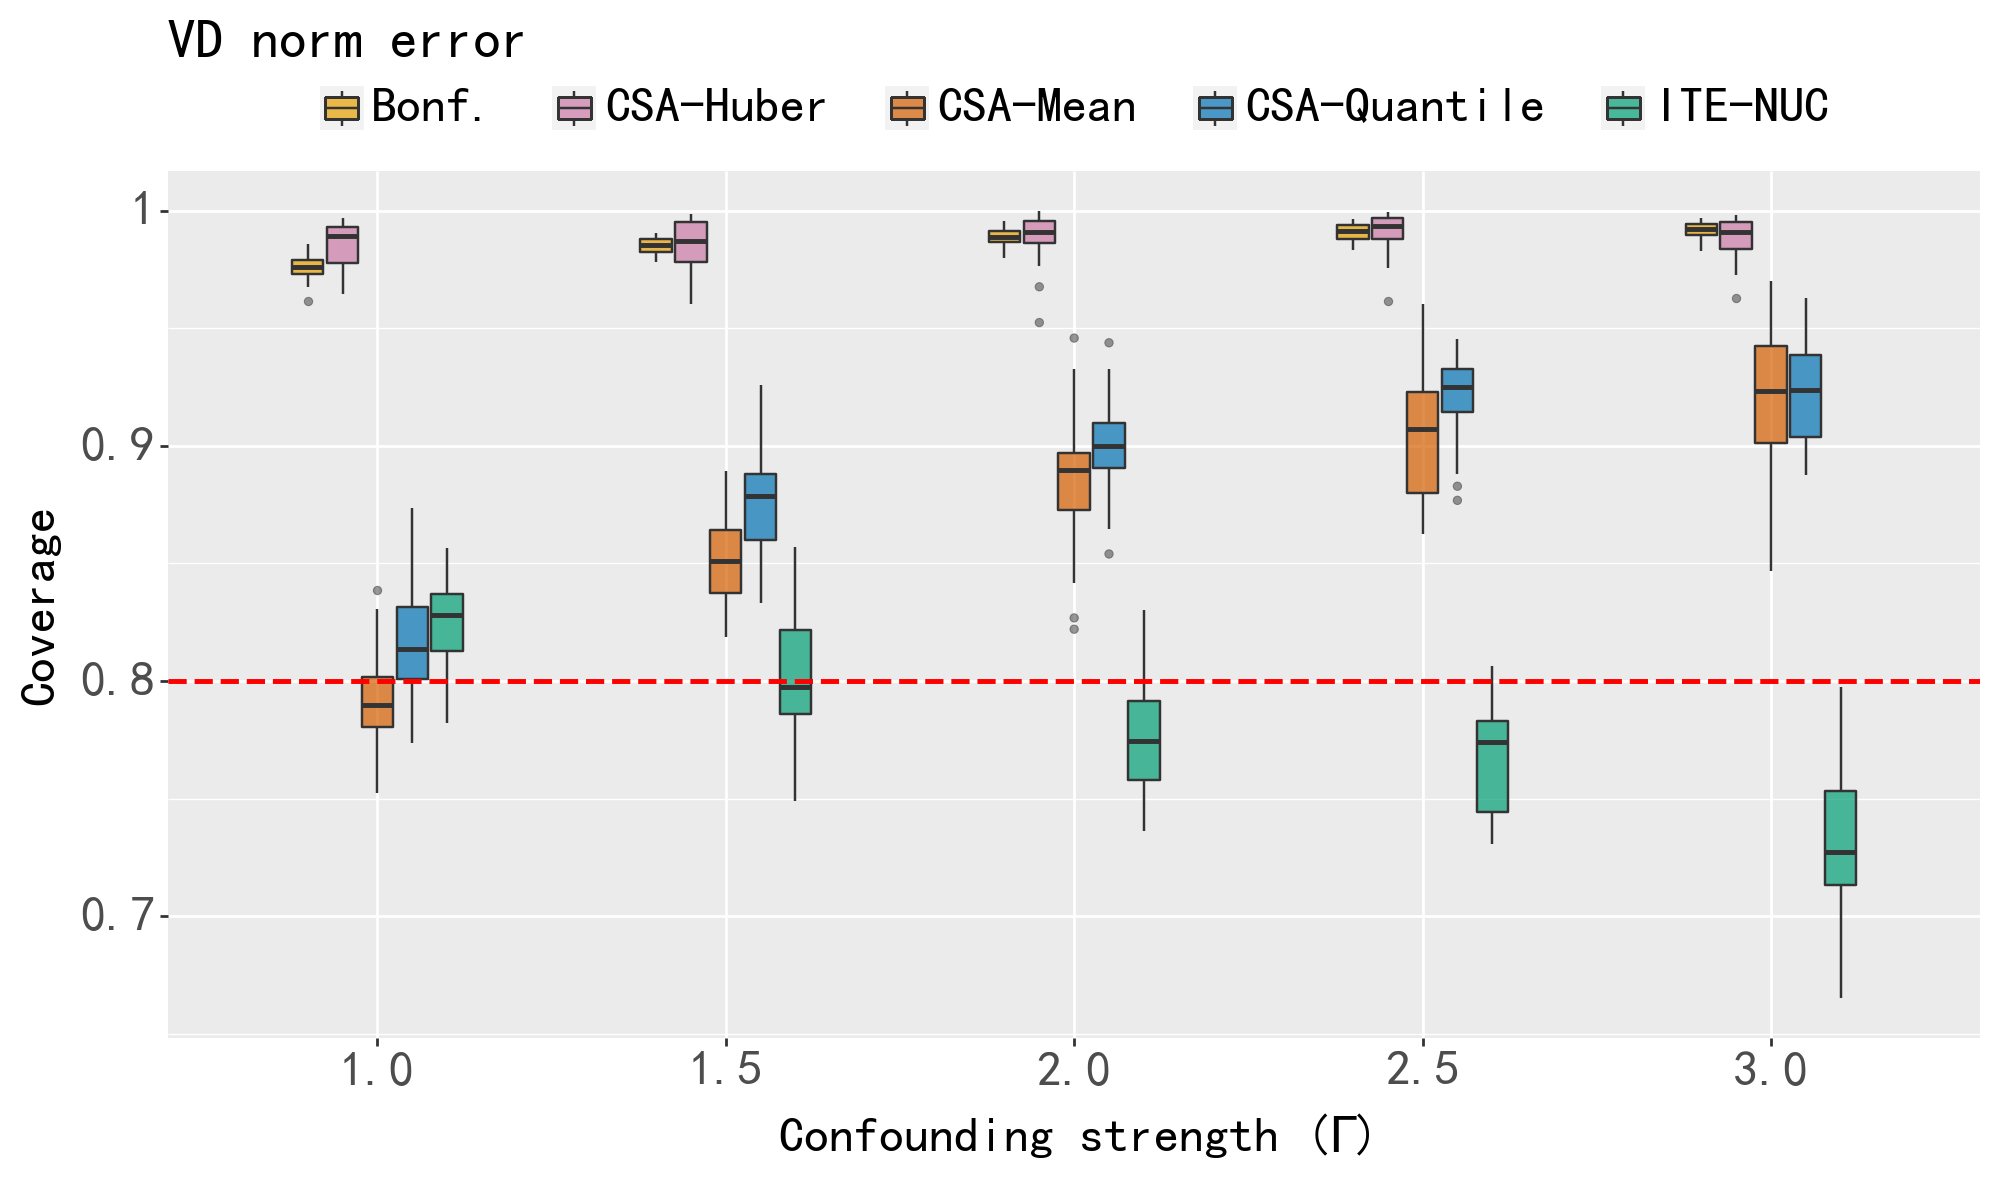

In [24]:
# %%
#### Coverage plot #######

alpha = 0.2
t = "Coverage"
#dtype = "norm"
dtype = "norm"

data_path = "../results/synthetic/"
subdirs = data_path+"VD/{}/".format(dtype)
#subdirs = data_path+"/ITE_of_VDVK/DATA/VK/{}/".format(dtype)

groups = ['CSA-huber', 'CSA-M', 'CSA-Q', 'CSA-B', 'ITE_NUS']
Ds = []

gmms = []
for gamma in np.arange(1, 3.5, 0.5): #1, 2, 3
    gmms.append(gamma)
    if gamma % 1 == 0:
        gamma = int(gamma)
    sub = subdirs + "gmm_{}/".format(gamma)
    if t == "Coverage":
        reader = pd.read_csv(sub + "coverage.csv")
    if t == "Interval_length":
        reader = pd.read_csv(sub + "len.csv")
    reader['gmm'] = gamma
    Ds.append(reader)

Data = pd.concat(Ds)

Data['group'] = Data['group'].map({
    'CSA-huber': 'CSA-Huber', 
    'CSA-B': 'Bonf.', 
    'CSA-M': 'CSA-Mean', 
    'CSA-Q': 'CSA-Quantile', 
    'ITE-NUC': 'ITE-NUC'})
Data['gmm_cat'] = pd.Categorical(Data['gmm'], categories=list(sorted(gmms)))

p = ggplot(Data, aes(x='gmm_cat', y=t, fill='group')) + geom_boxplot(alpha=0.7, outlier_alpha=0.5, outlier_stroke=0.2,
                                                                     width=0.5) + theme(figure_size=(10, 6),
                                                                                        legend_position="top",
                                                                                        legend_entry_spacing_x=20,
                                                                                        # subplots_adjust={'right': 0.8},\
                                                                                        text=element_text(size=18), \
                                                                                        title=element_text(size=18), \
                                                                                        legend_title=element_blank(), \
                                                                                        legend_entry_spacing_y=20, \
                                                                                        legend_margin=-7
                                                                                        ) + \
    labs(x=r'Confounding strength ($\Gamma$)', y=t) + \
    scale_fill_manual({
        'CSA-Huber': palette[4],
        'CSA-Mean': palette[0], 
        'CSA-Quantile': palette[2], 
        'ITE-NUC': palette[3], 
        'Bonf.': palette[1]})+\
    ggtitle('VD '+dtype+' error') + \
    theme(plot_title=element_text(size=20))

if t == "Coverage":
    p += geom_hline(yintercept=1 - alpha, linetype='dashed', size=1, color='red')

ggplot.draw(p)
#plt.tight_layout()

In [41]:
# %%
#### Coverage plot #######

alpha = 0.2
dataset = "VD"
#t = "Interval_length"
t = "Coverage"
#dtype = "norm"
dtype = "norm"
if dtype == 'norm':
    mytitle = dataset+" normal error"
elif dtype == 'norm_p':
    mytitle = dataset+" normal-polluted error"
elif dtype =='heavy':
    mytitle = dataset+" logistic error"

data_path = "../results/synthetic/"
subdirs = data_path+dataset+"/{}/".format(dtype)
#subdirs = data_path+"/ITE_of_VDVK/DATA/VK/{}/".format(dtype)

groups = ['CSA-huber', 'CSA-M', 'CSA-Q', 'CSA-B', 'ITE_NUS']
Ds = []

gmms = []
for gamma in np.arange(1, 4, 1): #1, 2, 3
    gmms.append(gamma)
    if gamma % 1 == 0:
        gamma = int(gamma)
    sub = subdirs + "gmm_{}/".format(gamma)
    if t == "Coverage":
        reader = pd.read_csv(sub + "coverage.csv")
    if t == "Interval_length":
        reader = pd.read_csv(sub + "len.csv")
    reader['gmm'] = gamma
    Ds.append(reader)

Data = pd.concat(Ds)

Data['group'] = Data['group'].map({
    'CSA-huber': 'CSA-Huber', 
    'CSA-B': 'Bonf.', 
    'CSA-M': 'CSA-Mean', 
    'CSA-Q': 'CSA-Quantile', 
    'ITE-NUC': 'ITE-NUC'})
Data['gmm_cat'] = pd.Categorical(Data['gmm'], categories=list(sorted(gmms)))

p = ggplot(Data, aes(x='gmm_cat', y=t, fill='group')) + geom_boxplot(alpha=0.7, outlier_alpha=0.5, outlier_stroke=0.2,
                                                                     width=0.5) + theme(figure_size=(10, 6),
                                                                                        legend_position="top",
                                                                                        legend_entry_spacing_x=20,
                                                                                        # subplots_adjust={'right': 0.8},\
                                                                                        text=element_text(size=18), \
                                                                                        title=element_text(size=18), \
                                                                                        legend_title=element_blank(), \
                                                                                        legend_entry_spacing_y=20, \
                                                                                        legend_margin=-7
                                                                                        ) + \
    labs(x=r'Confounding strength ($\Gamma$)', y=t) + \
    scale_fill_manual({
        'CSA-Huber': palette[4],
        'CSA-Mean': palette[0], 
        'CSA-Quantile': palette[2], 
        'ITE-NUC': palette[3], 
        'Bonf.': palette[1]})+\
    ggtitle(mytitle) + \
    theme(plot_title=element_text(size=20))

if t == "Coverage":
    p += geom_hline(yintercept=1 - alpha, linetype='dashed', size=1, color='red')

ggplot.draw(p)
ggplot.save(p,"../figures/cov_len_shrinkage/"+dataset+"_"+dtype+"_"+t+".png")


c:\Users\EvaSong\AppData\Local\Programs\Python\Python310\lib\site-packages\plotnine\ggplot.py:587: PlotnineWarning: Saving 10 x 6 in image.
c:\Users\EvaSong\AppData\Local\Programs\Python\Python310\lib\site-packages\plotnine\ggplot.py:588: PlotnineWarning: Filename: ../figures/cov_len_shrinkage/VD_norm_Coverage.png


In [10]:
# # %%
# #### Length plot #######

# alpha = 0.2
# t = "Interval_length"
# #dtype = "norm"
# dtype = "t3"

# #subdirs = data_path+"/ITE_of_VDVK/DATA/VD/{}/".format(dtype)
# #subdirs = data_path+"/ITE_of_VDVK/DATA/VK/{}/".format(dtype)
# subdirs = "../results/synthetic/norm/"

# #groups = ['sa_huber_0.1', 'sa_huber_0.3', 'sa_huber_0.5', 'sa_huber_0.7', 'sa_huber_0.9']
# groups = ['CSA-huber', 'CSA-M', 'CSA-Q', 'CSA-B', 'ITE_NUS']
# Ds = []
# gmms = []
# for gamma in np.arange(1, 3.5, 0.5): #1, 2, 3
#     gmms.append(gamma)
#     if gamma % 1 == 0:
#         gamma = int(gamma)
#     sub = subdirs + "gmm_{}/".format(gamma)
#     reader = pd.read_csv(sub + "len.csv")
#     reader['gmm'] = gamma
#     for group in groups:
#         ls = reader.loc[reader['group'] == group].iloc[:, 0].values
#         d = {"gmm": gamma, "center": np.median(ls), "min": np.quantile(ls, 0.), \
#              "max": np.quantile(ls, 1), "group": group}
#         Ds.append(pd.DataFrame(data=d, index=[0]))

# Data = pd.concat(Ds)
# # Data['group'] = Data['group'].map({
# #     'sa_huber_0.1': 'huber-1', 
# #     'sa_huber_0.3': 'huber-3', 
# #     'sa_huber_0.5': 'huber-5', 
# #     'sa_huber_0.7': 'huber-7', 
# #     'sa_huber_0.9': 'huber-9'})
# Data['group'] = Data['group'].map({
#     'CSA-huber': 'CSA-Huber', 
#     'CSA-B': 'Bonf.', 
#     'CSA-M': 'CSA-M', 
#     'CSA-Q': 'CSA-Q', 
#     'ITE-NUC': 'ITE-NUC'})
# Data['gmm_cat'] = pd.Categorical(Data['group'])

# p = ggplot(Data, aes(x='gmm', y='center', group='gmm_cat', colour='gmm_cat')) + \
#     geom_line(aes(group='gmm_cat'), size=1.3) + \
#     geom_point(size=4) + \
#     geom_errorbar(aes(ymin='min', ymax='max'), width=.2, size=0.8) + \
#     labs(x=r'Confounding strength ($\Gamma$)', y='Interval length') + \
#     theme(figure_size=(9, 7), \
#           legend_position='right', \
#           subplots_adjust={'right': 0.8}, \
#           text=element_text(size=18), \
#                     title=element_text(size=18), \
#           legend_title=element_blank(), \
#           legend_entry_spacing_y=20
#           ) + \
#     scale_fill_manual({
#         'CSA-H': palette[4],
#         'CSA-M': palette[0], 
#         'CSA-Q': palette[2], 
#         'ITE-NUC': palette[3], 
#         'Bonf.': palette[1]})
#     # scale_fill_manual({
#     #     'huber-1': palette[0], 
#     #     'huber-3': palette[2],
#     #     'huber-5': palette[3],
#     #     'huber-7': palette[4],
#     #     'huber-9': palette[5]})

# ggplot.draw(p)

c:\Users\EvaSong\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
c:\Users\EvaSong\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide


IndexError: cannot do a non-empty take from an empty axes.

In [9]:
# %%
#### Shrinkage plot #######

def get_fcts(subdirs, group):
    gmms = []
    Median = []
    Max = []
    Min = []

    for gamma in np.arange(1, 3, 0.5):
        gmms.append(gamma)
        if gamma % 1 == 0:
            gamma = int(gamma)
        sub = subdirs + "gmm_{}/".format(gamma)

        t = 'fct_val'

        reader = pd.read_csv(sub + "fct.csv")
        df = reader[reader['group'] == group]
        vals = df[t].values

        for i in range(df.shape[0]):
            if vals[i] > 1:
                df[t].iloc[i] = 1
        df[t] = 100 - 100 * df[t]
        mean = np.mean(df[t])
        std = np.std(df[t])
        Median.append(mean)

        Max.append(mean + std)
        Min.append(max(0, mean - std))
    d = {"gmm": gmms, "min": Min, "max": Max, 'median': Median}
    return d

In [10]:
dtype = "norm"
#dtype = "t3"

#subdirs = data_path+"/ITE_of_VDVK/DATA/VD/{}/".format(dtype)
#subdirs = data_path+"/ITE_of_VDVK/DATA/VK/{}/".format(dtype)
subdirs = "DATA/VD/{}/".format(dtype)
groups = ["CSA-M", "CSA-Q"]

Ds = []

for group in groups:
    print(group)
    d = get_fcts(subdirs, group)
    d['group'] = group
    Ds.append(pd.DataFrame(data=d))
Data = pd.concat(Ds)

p = ggplot(Data, aes(x='gmm', y='median', group='group', colour='group')) + \
    geom_point(size=4) + \
    geom_line(aes(group='group'), size=1.3) + \
    labs(x='Confounding strength ($\Gamma$)', y='Shrinkage Factor (%)') + \
    geom_line(aes(group='group'), size=1.3) + \
    geom_errorbar(aes(ymin='min', ymax='max'), width=0.2, size=0.8) + \
    theme(figure_size=(9, 7), \
          legend_position='right', \
          legend_key=element_blank(), \
          legend_background=element_blank(), \
          subplots_adjust={'right': 0.8}, \
          text=element_text(size=18), \
          title=element_text(size=18), \
          legend_title=element_blank(), \
          legend_entry_spacing_y=20
          ) + \
    scale_fill_brewer(type="qual", palette="Accent") + \
    scale_color_brewer(type="qual", palette="Accent") + \
    scale_color_manual({'CSA-M': palette[0], 'CSA-Q': palette[2]})

ggplot.draw(p)
plt.tight_layout()

CSA-M


FileNotFoundError: [Errno 2] No such file or directory: 'DATA/VD/norm/gmm_1/fct.csv'